# Media Company Case study


This is also a case study for multiple linear regression, as in it we have to compute relation between number of viewers on netflix and what are the factors of decreasing the number of viewers on it.

Problem Statement: A digital media (e.g. voot, hotstar, netflix, etc) have launched a show, initially the show got a good response but after some time the show got declined viewership. The company wants to know the reason of it...

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
media=pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


As we can see in the above data there is a bad column (Unnamed) which needs to be removed.

In [7]:
media.drop("Unnamed: 7", axis=1,inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [9]:
#Converting date to pandas datetime format
media['Date']=pd.to_datetime(media['Date'])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [25]:
#deriving days since the show started
from datetime import date
media['Date_2'] = pd.to_datetime(media['Date']).dt.date
d0=date(2017, 2, 28)
d1=media.Date_2
delta= d1 - d0
media['day']=delta
media.drop('Date_2',axis=1,inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


Now we don't want this days string with our day data

In [29]:
#Cleaning data
media['day']=media['day'].astype(str) #converting it to string
media['day']=media['day'].map(lambda x: x[0:2]) #traversing string and reducing string to only frist character
media['day']=media['day'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


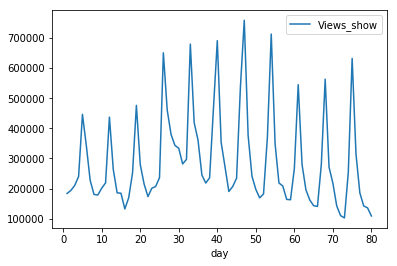

In [34]:
#plotting a graph day vs views_show
media.plot.line(x='day',y='Views_show')

We can observe here a sharp decline after few days....

# Adding weekdays

1 - Sunday ,
2- Monday ,
3- Tuesday ,
and so on....

In [37]:
media['weekday']=(media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday']=media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Creating first model (lm1) for weekday vs visitors

In [39]:
X=media[['Visitors','weekday']]
Y=media['Views_show']

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm=LinearRegression()

In [43]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_1=sm.OLS(Y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           8.01e-12
Time:                        11:52:23   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [45]:
#creating weekend column with adding 1 for weekend and 0 for weekdays
def cond(i):
    if i%7==5: return 1
    elif i%7 == 4: return 1
    else: return 0
    return i
media['weekend']=[cond(i) for i in media['day']]
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [46]:
X=media[['Visitors','weekend']]
y=media['Views_show']
lm.fit(X,Y)
X=sm.add_constant(X)
lm_2=sm.OLS(Y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           2.51e-12
Time:                        12:01:04   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3


--------->Here we can notice that weekend is getting more R-squared value which is better than weekdays

# Making a new model (lm3) visitors,weekend and character(actor)A

In [47]:
X=media[['Visitors','weekend','Character_A']]
Y=media['Views_show']
lm.fit(X,Y)
X=sm.add_constant(X)
lm_3=sm.OLS(Y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        12:07:01   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

-----> This lm_3 model signifies that when character a is present on weekends the number of viewers increases which is shown by increased R-squared value.

# Adding a derived column 

Adding lag views that means that weather last day's views impact today's views.

In [51]:
#Creating lag variable
media['Lag_Views']=np.roll(media['Views_show'],1) # rolling one row each
media.Lag_Views.replace(108961,0,inplace=True) # last value will become the first value we have to make it zero
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


# Creating next model(lm_4) 

In [53]:
X=media[['Visitors','Character_A','Lag_Views','weekend']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_4=sm.OLS(Y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.16e-21
Time:                        12:21:08   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

---->Lag_Views column improved R-squared value but it is of not much use because if we tell marketing team that yesterday's views are going to impact today's views, that means nothing to them, nobody can do anything about it so we have to get rid of this column...

---->And also we can observe that our p value for visitors have increased so we will remove this column also.

# Creating model(lm_5) with weekend,character A, views_platform

In [54]:
X=media[['weekend','Character_A','Views_platform']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_5=sm.OLS(Y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           3.59e-15
Time:                        12:31:06   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

---> The obove model is quite good but again views on platform is not giving much sense so we remove it and again add visitors...

#  Creating model(lm_6) using visitors,character_A,weekend

In [56]:
X=media[['Visitors','Character_A','weekend']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_6=sm.OLS(Y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        12:35:49   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

# Creating model(lm_7) using visitors,character_A,weekend, Ad_impression

In [57]:
X=media[['Visitors','Character_A','weekend','Ad_impression']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_7=sm.OLS(Y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.10e-25
Time:                        12:38:43   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

----> We can observe here that our r-squared value have become so high now which is too good but along with this we can also observe that p values have become insignificant i.e. p value for visitors have become so high and also coef value of character A is now negative which depicts that characterA is having negative impact on our model now...

# Creating model(lm_8) using character_A,weekend, Ad_impression

In [59]:
X=media[['Character_A','weekend','Ad_impression']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_8=sm.OLS(Y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        12:43:23   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

# Scaling Ad_impression

In [60]:
media['ad_impression_million']=media['Ad_impression']/1000000

# Creating model(lm_9) using character_A,weekend, ad_impression_million, cricket_match_india 

In [62]:
X=media[['Character_A','weekend','ad_impression_million','Cricket_match_india']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_9=sm.OLS(Y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.02e-25
Time:                        12:49:03   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

---------> We can see  that p value for cricket is very high so we can remove it and proceed further

 # Creating model(lm_10) using character_A,weekend, ad_impression_million

In [63]:
X=media[['Character_A','weekend','ad_impression_million']]
Y=media['Views_show']
X=sm.add_constant(X)
lm_10=sm.OLS(Y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 24 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        12:54:50   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

# Prediction using lm_10 model

In [71]:
predicted_views=lm_10.predict(X)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(media.Views_show,predicted_views)
r_squared=r2_score(media.Views_show,predicted_views)
print("mean_squared_error : ",mse)
print("r2_score : ",r_squared)

ValueError: shapes (80,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

# Actual VS Predicted

Text(0,0.5,'Views')

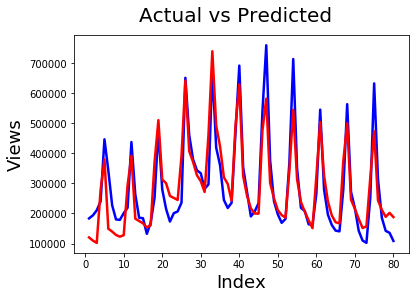

In [70]:
c= [i for i in range(1,81,1)] # generating indexes
fig =plt.figure()
plt.plot(c, media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, predicted_views, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual vs Predicted", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=18)

# Comparing with another model(lm_6)


Text(0,0.5,'Views')

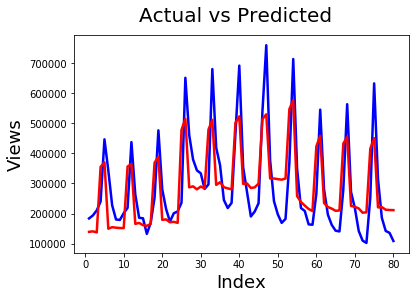

In [74]:
X=media[['Visitors','Character_A','weekend']]
X=sm.add_constant(X)
Y=media['Views_show']
predicted_view=lm_6.predict(X)
c= [i for i in range(1,81,1)] # generating indexes
fig =plt.figure()
plt.plot(c, media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, predicted_view, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual vs Predicted", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views',fontsize=18)

-----> From the above two model representation we can observe that lm_10 is a better model than lm_6 model...

# X------------X------ End Of Case Study-------X---------------X